In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import networkx as nx

from net_prob import GeneGraph

# osmFISH

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


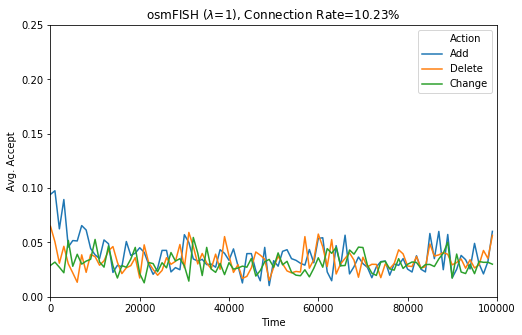

<Figure size 288x288 with 0 Axes>

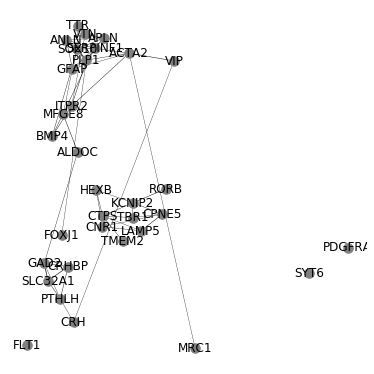

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


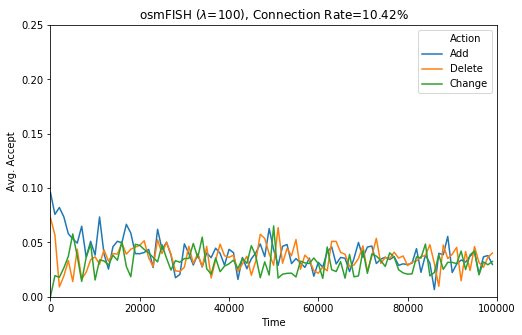

<Figure size 288x288 with 0 Axes>

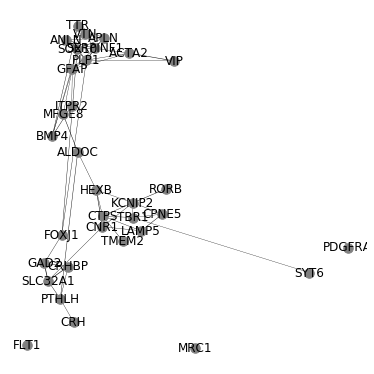

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


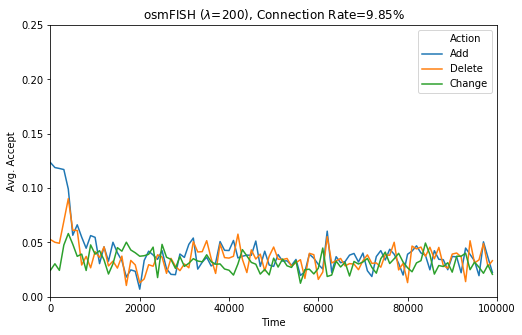

<Figure size 288x288 with 0 Axes>

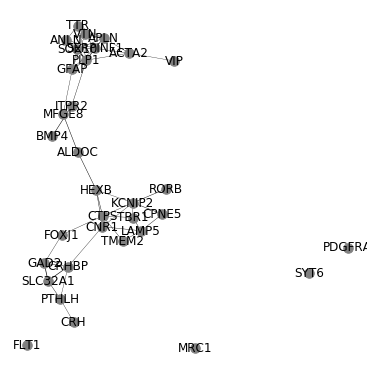

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


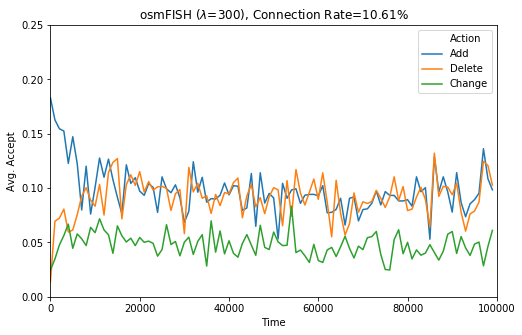

<Figure size 288x288 with 0 Axes>

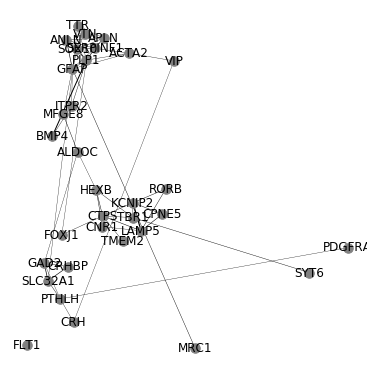

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


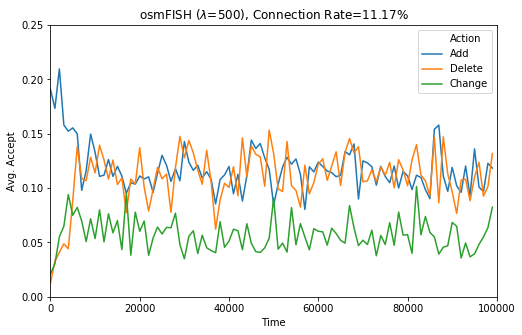

<Figure size 288x288 with 0 Axes>

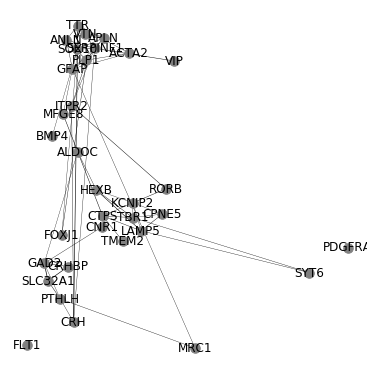

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


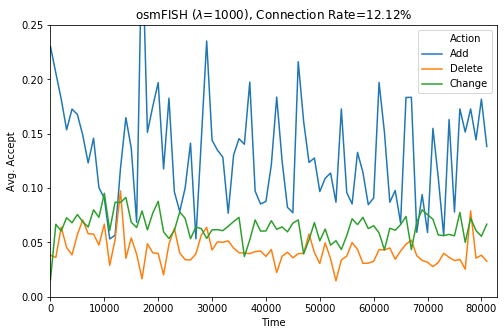

<Figure size 288x288 with 0 Axes>

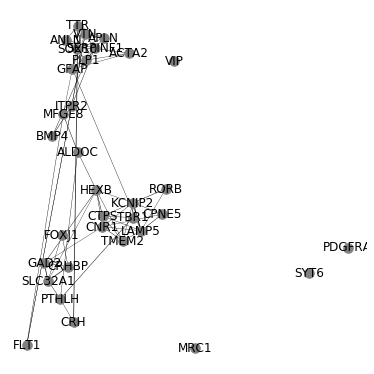

In [18]:
STEP = 1000

with open("result_osmFISH_200.pickle", "rb") as f:
    g, _ = pickle.load(file=f)
pos = nx.spring_layout(g.g)

for poisson in [1, 100, 200, 300, 500, 1000]:
    with open("result_osmFISH_{}.pickle".format(poisson), "rb") as f:
        g, accept = pickle.load(file=f)
        
    num = len(accept)
    
    new_accept = []
        
    for i in range(int(num/STEP)):
        new_accept.append([i*STEP, "Add", np.mean([x[2] for x in accept[max(0, int(i*STEP-STEP/2)): min(num, int(i*STEP+STEP/2))] if x[1]=="add"])])
        new_accept.append([i*STEP, "Delete", np.mean([x[2] for x in accept[max(0, int(i*STEP-STEP/2)): min(num, int(i*STEP+STEP/2))] if x[1]=="delete"])])
        new_accept.append([i*STEP, "Change", np.mean([x[2] for x in accept[max(0, int(i*STEP-STEP/2)): min(num, int(i*STEP+STEP/2))] if x[1]=="change"])])
    df = pd.DataFrame(new_accept, columns=["Time", "Action", "Avg. Accept"])
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(x="Time", y="Avg. Accept", hue="Action", data=df)
    plt.xlim(0, num)
    plt.ylim(0, 0.25)
    plt.title("osmFISH ($\lambda$)")
    plt.title("osmFISH ($\lambda$={}), Connection Rate={:.2f}%".format(poisson, 100*nx.number_of_edges(g.g)/g.ngene/(g.ngene-1)*2))
    plt.savefig("figure/accept/osmFISH_{}.pdf".format(poisson), bbox_inches='tight')
    
    plt.figure(figsize=(4, 4))
    g.position(pos)
    g.print("figure/net/osmFISH_{}.pdf".format(poisson))

In [3]:
nx.number_of_edges(g.g)

64

In [4]:
len([g.g[u][v]['weight'] / 100 for u, v in g.g.edges() if g.g[u][v]['weight']>0.3])

64

In [5]:
g.likelihood()

Likelihood
4.109636272482701e+115


6.833849149278552e+89

# Distributions

In [6]:
from scipy.stats import poisson, expon
poisson.pmf(300, 100)

1.2154826552310102e-58

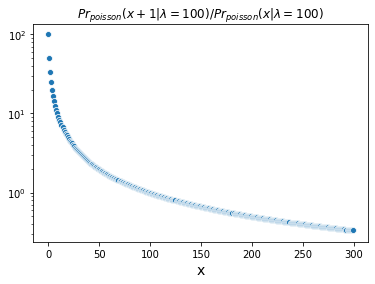

In [7]:
x = list(range(300))
y = [poisson.pmf(i+1, 100)/poisson.pmf(i, 100) for i in x]
sns.scatterplot(x, y)
plt.yscale("log")
plt.title("$Pr_{poisson}(x+1|\lambda=100) / Pr_{poisson}(x|\lambda=100)$")
plt.xlabel("x", fontsize=14)
plt.savefig("figure/whypoisson.pdf")

In [8]:
y[90:110]

[1.0989010989010137,
 1.0869565217391597,
 1.075268817204326,
 1.0638297872340459,
 1.052631578947441,
 1.0416666666665804,
 1.0309278350515194,
 1.0204081632653823,
 1.0101010101009722,
 1.0,
 0.9900990099010704,
 0.9803921568626683,
 0.9708737864077863,
 0.9615384615385272,
 0.9523809523809116,
 0.9433962264150924,
 0.9345794392523414,
 0.9259259259259112,
 0.9174311926604859,
 0.9090909090909828]

/Users/sherilynw/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/sherilynw/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


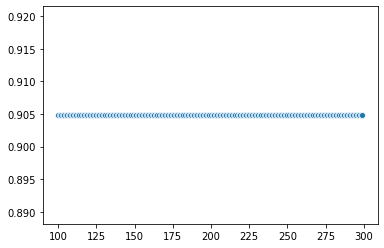

In [9]:
x = list(range(300))
y = [expon.pdf(i+1, loc=100, scale=10)/expon.pdf(i, loc=100, scale=10) for i in x]
sns.scatterplot(x, y)